# Notebook to test data 
### Vera Jackson 

## Packages


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [27]:
nutrition = pd.read_csv("../data/Nutrition.csv")

print(nutrition.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


There are 33 columns, and **104,272** rows or observations

In [28]:
nutrition.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH


In [40]:
# Obtaining unique values of all field of interest
# column "data_value" gives us percent
print(nutrition['YearStart'].unique())
print(nutrition['Age(years)'].unique())
print(nutrition['Education'].unique())
print(nutrition['Gender'].unique())
print(nutrition['Income'].unique())
print(nutrition['Race/Ethnicity'].unique())
print(nutrition['Class'].unique())
print(nutrition['Topic'].unique())
print(nutrition['StratificationCategory1'].unique())

nutrition['Question'].unique()

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
[nan '35 - 44' '25 - 34' '18 - 24' '55 - 64' '65 or older' '45 - 54']
[nan 'Less than high school' 'Some college or technical school'
 'High school graduate' 'College graduate']
[nan 'Female' 'Male']
[nan '$15,000 - $24,999' '$50,000 - $74,999' '$75,000 or greater'
 'Less than $15,000' '$25,000 - $34,999' 'Data not reported'
 '$35,000 - $49,999']
['2 or more races' 'Other' nan 'Non-Hispanic White' 'Asian'
 'Hawaiian/Pacific Islander' 'American Indian/Alaska Native' 'Hispanic'
 'Non-Hispanic Black']
['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']
['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']
['Race/Ethnicity' 'Gender' 'Age (years)' 'Income' 'Education' 'Total']


array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combinatio

## Visualizing

In [43]:
# separating dataset by question

nutrition_noleisuretime = nutrition[nutrition['Question']=='Percent of adults who engage in no leisure-time physical activity']


nutrition_noleisuretime_income = nutrition_noleisuretime[nutrition_noleisuretime['StratificationCategory1']=='Income']

nutrition_noleisuretime_income

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
16,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q047,VALUE,2,Income,"$50,000 - $74,999",INC,INC5075
59,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q047,VALUE,2,Income,"Less than $15,000",INC,INCLESS15
102,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q047,VALUE,2,Income,"$35,000 - $49,999",INC,INC3550
111,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q047,VALUE,2,Income,"$25,000 - $34,999",INC,INC2535
156,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q047,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104158,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Income,"Less than $15,000",INC,INCLESS15
104159,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Income,"$35,000 - $49,999",INC,INC3550
104173,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Income,"$25,000 - $34,999",INC,INC2535
104216,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Income,"$50,000 - $74,999",INC,INC5075


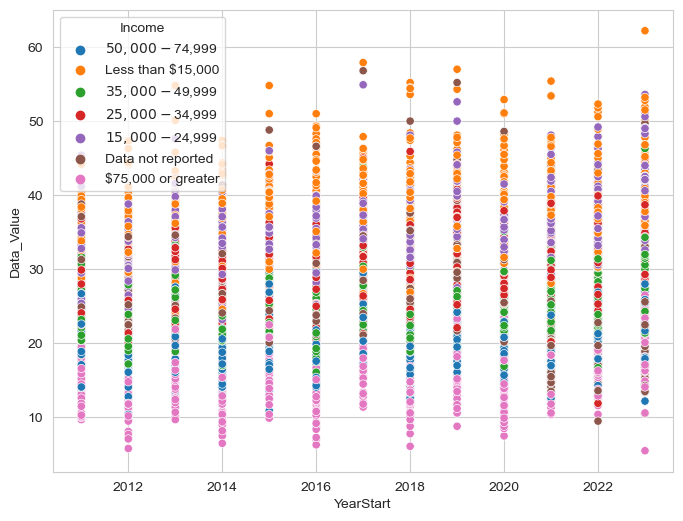

In [46]:
# setting up for plot
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

sns.scatterplot(data=nutrition_noleisuretime_income, x='YearStart', y='Data_Value', hue='Income')
plt.show()